<a href="https://colab.research.google.com/github/jun108059/til/blob/master/caltech_CNN_jpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 # for mount (google drive → colab)
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
!ls "/drive/My Drive"

 caltech101   caltech_CNN.jpynb  'Getting started.pdf'	 test.ipynb


In [8]:
# 학습 데이터셋 준비 및 이미지 전처리
# 케라스 라이브러리 활용
# ImageDataGenerator import
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1. / 225, validation_split = 0.2)

# 배치 사이즈 = 16
# 이미지 사이즈 = 200x200 픽셀
# caltech101 데이터셋은 이미지 사이즈가 제각각
# data generator의 옵션을 통해 크기 통일

# train 데이터셋 설정
# (1) tarin_datagen을 ImageDataGenerator 클래스로 위에서 선언
# > ImageDataGenerator는 '.flow', '.flow_from_directory', '.flow_from_dataframe'등을 사용할 수 있음
# > 내가 사용하는 데이터셋은 폴더별로 분류되어 있기 때문에 flow_from_directory 사용
# (2) 데이터셋이 존재하는 폴더 경로를 지정
# > 구글 드라이브 마운트 주소 : 'drive/My Drive/caltech101'
# (3) target_size & batch_size를 위에서 설정한 사이즈로 지정
# (4) 총 101개의 종류를 분류하는 것이기 때문에 binary가 아닌 categorical로 설정
# (5) subset은 training으로 지정

batch_size = 16
input_image_size = (200, 200)

train_generator = train_datagen.flow_from_directory(
    '/drive/My Drive/caltech101',
    target_size = input_image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

Found 6982 images belonging to 101 classes.


In [9]:
# validation 데이터셋 설정
# validation 데이터셋이 존재하는 폴더를 따로 만든 것이 아님
# 따라서 training 데이터셋이 존재하는 폴더를 지정해줘야 함
# 다른 모든 내용은 training 데이터셋과 동일
# 결과적으로 데이터셋을 미리 분류해 놓지 않아도 됨
# subset은 validation으로 지정

validation_generator = train_datagen.flow_from_directory(
    '/drive/My Drive/caltech101',
    target_size = input_image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1695 images belonging to 101 classes.


In [0]:
# 데이터셋 준비와 전처리 끝
# 실제 진행 상황
# (1) 데이터셋 다운로드 및 구글 드라이브에 업로드
# (2) 코랩 설치
# (3) 코랩에 구글 드라이브 마운트
# (4) 코드 작성

Found 6982 images belonging to 101 classes.
Found 1695 images belonging to 101 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 64)        0         
________________________________

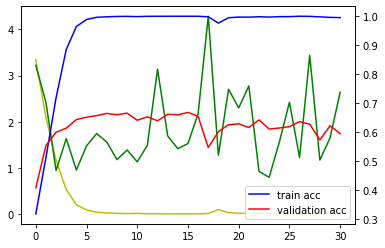

In [15]:
from keras.layers import Dense, Input, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1. / 225, validation_split = 0.2)

batch_size = 16
input_image_size = (200, 200)

train_generator = train_datagen.flow_from_directory(
    '/drive/My Drive/caltech101',
    target_size = input_image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    '/drive/My Drive/caltech101',
    target_size = input_image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (200, 200, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(101))
model.add(Activation('softmax'))
model.summary()

model.compile(
    optimizer = optimizers.adam(),
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

early_stopping = EarlyStopping(patience = 15, mode = 'auto', monitor = 'val_acc')
hist = model.fit_generator(train_generator, steps_per_epoch = train_generator.samples // batch_size,
                           validation_data = validation_generator,
                           epochs = 100,
                           callbacks = [early_stopping])

import matplotlib
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label = 'validation loss')
acc_ax.plot(hist.history['acc'], 'b', label = 'train acc')
acc_ax.plot(hist.history['val_acc'], 'r', label = 'validation acc')

plt.legend(['train acc', 'validation acc', 'train loss', 'validation loss'])
plt.show()